# Understanding Principal Component Analysis (PCA) with Environmental, Social, and Governance (ESG) data

This notebook demonstrates how **Principal Component Analysis (PCA)** can be applied to ESG (Environmental, Social, and Governance) score data.  

The main objectives are:
- Understand the **motivation** for using PCA in finance and ESG analysis.
- Learn the **step-by-step process** of preparing data for PCA.
- **Interpret and visualise** the results to gain insights.

Throughout the notebook, you will see **commentary cells like this one** that explain what the code is doing, why it is being done, and how it relates to practical data analysis.


## Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Step 1: Creating a Realistic ESG Dataset

In this step, we generate a synthetic dataset that represents **Environmental, Social, and Governance scores** for a number of companies.

Why synthetic data?
- It allows us to practice without relying on proprietary datasets.
- We can control the structure, scale, and noise of the data.

**Concepts introduced here:**
- **Data simulation**: Creating data for testing and learning purposes.
- **ESG metrics**: Key indicators used to evaluate a company’s sustainability practices and governance standards. We'll treat these as numerical features suitable for PCA later on.


In [2]:
# =============================================================================
# STEP 1: Create Realistic ESG Dataset
# =============================================================================

def create_esg_dataset(n_companies=200):
    """
    Create a synthetic but realistic ESG dataset for demonstration
    """
    
    # Company names
    companies = [f"Company_{i+1}" for i in range(n_companies)]
    
    # Create correlated ESG metrics (realistic correlations)
    np.random.seed(42)
    
    # Environmental metrics (tend to be correlated)
    carbon_efficiency = np.random.normal(50, 20, n_companies)
    renewable_energy = carbon_efficiency * 0.7 + np.random.normal(0, 10, n_companies)
    waste_reduction = carbon_efficiency * 0.6 + np.random.normal(0, 12, n_companies)
    water_usage = 100 - carbon_efficiency * 0.5 + np.random.normal(0, 15, n_companies)
    
    # Social metrics (moderately correlated with environmental)
    employee_satisfaction = carbon_efficiency * 0.4 + np.random.normal(60, 15, n_companies)
    diversity_score = employee_satisfaction * 0.5 + np.random.normal(40, 12, n_companies)
    community_investment = carbon_efficiency * 0.3 + np.random.normal(30, 10, n_companies)
    safety_record = employee_satisfaction * 0.6 + np.random.normal(0, 8, n_companies)
    
    # Governance metrics (somewhat independent)
    board_independence = np.random.normal(70, 15, n_companies)
    transparency_score = board_independence * 0.4 + np.random.normal(50, 12, n_companies)
    executive_compensation = 100 - board_independence * 0.3 + np.random.normal(0, 20, n_companies)
    
    # Create DataFrame
    esg_data = pd.DataFrame({
        'Company': companies,
        'Carbon_Efficiency': np.clip(carbon_efficiency, 0, 100),
        'Renewable_Energy': np.clip(renewable_energy, 0, 100),
        'Waste_Reduction': np.clip(waste_reduction, 0, 100),
        'Water_Management': np.clip(water_usage, 0, 100),
        'Employee_Satisfaction': np.clip(employee_satisfaction, 0, 100),
        'Diversity_Score': np.clip(diversity_score, 0, 100),
        'Community_Investment': np.clip(community_investment, 0, 100),
        'Safety_Record': np.clip(safety_record, 0, 100),
        'Board_Independence': np.clip(board_independence, 0, 100),
        'Transparency': np.clip(transparency_score, 0, 100),
        'Exec_Compensation': np.clip(executive_compensation, 0, 100)
    })
    
    return esg_data

In [3]:
# Create our dataset
esg_df = create_esg_dataset(200)
print("ESG Dataset Created!")
print(f"Shape: {esg_df.shape}")
print("\nFirst few rows:")
esg_df

ESG Dataset Created!
Shape: (200, 12)

First few rows:


,Company,Carbon_Efficiency,Renewable_Energy,Waste_Reduction,Water_Management,Employee_Satisfaction,Diversity_Score,Community_Investment,Safety_Record,Board_Independence,Transparency,Exec_Compensation
0,Company_1,59.934283,45.531872,16.827438,81.387688,98.047970,100.000000,49.232530,50.453494,67.256553,99.716910,66.319468
1,Company_2,47.234714,38.672145,21.148328,62.550163,71.153215,86.672212,39.876359,46.985151,90.623146,85.521329,69.922683
2,Company_3,62.953771,54.898152,37.835187,81.567203,86.623320,84.027224,50.109106,61.459625,60.310537,65.623334,66.058440
3,Company_4,80.460597,66.860439,48.840125,80.104269,85.250110,74.861813,59.571159,56.901692,58.012120,55.040275,76.437133
4,Company_5,45.316933,17.945159,21.789374,83.543057,71.609330,84.183345,44.083680,50.933979,62.758847,53.465863,43.300053
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Company_196,57.706348,35.702687,28.503612,86.944119,78.866035,84.718714,49.158707,39.241775,58.720460,86.329987,69.144218
196,Company_197,32.322851,5.494651,16.155212,83.245247,99.894438,89.711566,26.225592,64.889897,65.214191,75.767421,88.953487
197,Company_198,53.074502,50.690875,20.099537,83.685259,90.842444,92.051101,36.206210,70.965430,58.059612,62.641349,82.965072
198,Company_199,51.164174,34.669524,25.366986,74.842688,71.897985,78.635962,57.353391,43.305141,86.140107,82.499239,61.328230


## Step 2: Exploratory Data Analysis (EDA)

Before applying PCA, we first explore the dataset to understand its structure.

**Why EDA is important:**
- Helps detect missing values or anomalies.
- Provides insights into the distribution of each variable.
- Guides decisions about scaling, cleaning, and transformations.

Typical EDA steps include:
- Displaying the first few rows of the dataset.
- Checking descriptive statistics.
- Plotting histograms or boxplots to visualise distributions.

Before PCA, inspect the data:

- **Shape & preview** (`head()`) to check columns and types.
- **Descriptive stats** (`describe()`) to see ranges and dispersion.
- **Missing values** (`isna().sum()`) to decide drop vs impute.
- **Distributions/outliers** (histograms/boxplots) to understand scaling needs.

This informs decisions on cleaning and standardisation.

In [4]:
# Check the DataFrame shape (rows, columns)
esg_df.shape

(200, 12)

In [5]:
# Get information about column names and data types
esg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                200 non-null    object 
 1   Carbon_Efficiency      200 non-null    float64
 2   Renewable_Energy       200 non-null    float64
 3   Waste_Reduction        200 non-null    float64
 4   Water_Management       200 non-null    float64
 5   Employee_Satisfaction  200 non-null    float64
 6   Diversity_Score        200 non-null    float64
 7   Community_Investment   200 non-null    float64
 8   Safety_Record          200 non-null    float64
 9   Board_Independence     200 non-null    float64
 10  Transparency           200 non-null    float64
 11  Exec_Compensation      200 non-null    float64
dtypes: float64(11), object(1)
memory usage: 18.9+ KB


In [6]:
# Check for missing values in the dataset
esg_df.isna().sum()

Company                  0
Carbon_Efficiency        0
Renewable_Energy         0
Waste_Reduction          0
Water_Management         0
Employee_Satisfaction    0
Diversity_Score          0
Community_Investment     0
Safety_Record            0
Board_Independence       0
Transparency             0
Exec_Compensation        0
dtype: int64

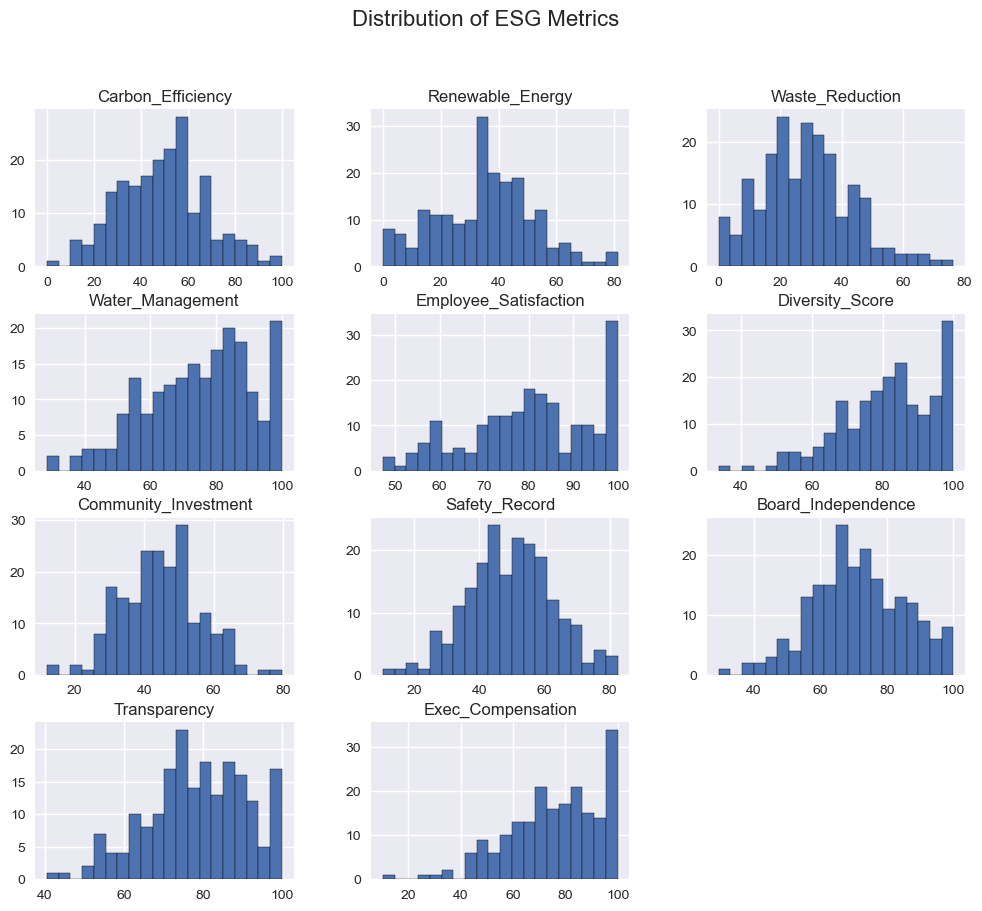

In [7]:
# Plot histograms for each ESG metric
esg_df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of ESG Metrics', fontsize=16)
plt.show()

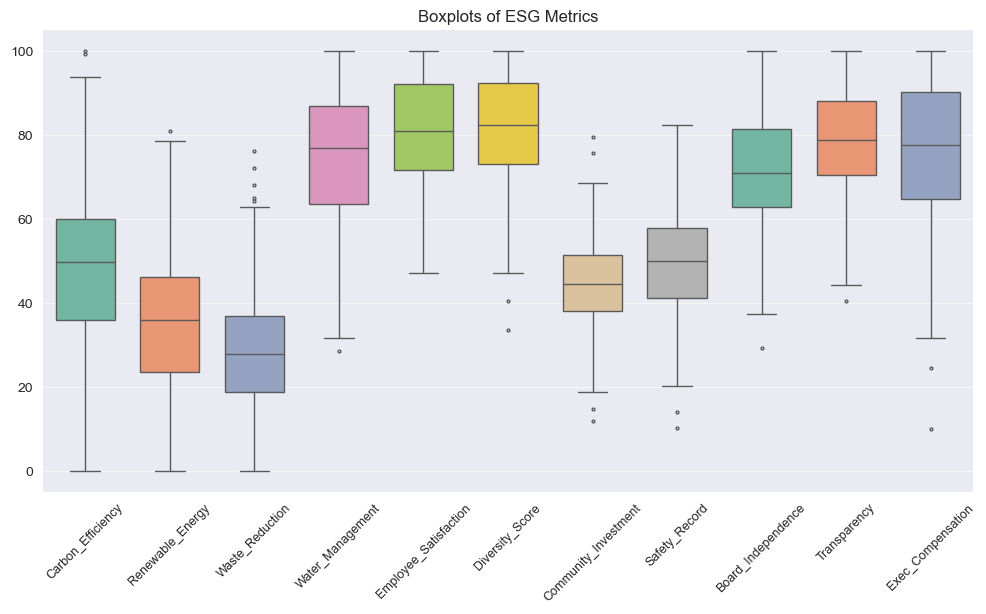

In [13]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=esg_df.drop(columns=['Company']),
            palette='Set2',           # Soft, pleasant colors
            linewidth=1,              # Thickness of lines 
            fliersize=2,              # SSize of outlier points
            width=0.7)                # Control box width)
plt.xticks(rotation=45, fontsize=9)
plt.grid(axis='y', alpha=0.6, linestyle='-', linewidth=0.8)
plt.title('Boxplots of ESG Metrics')
plt.show()

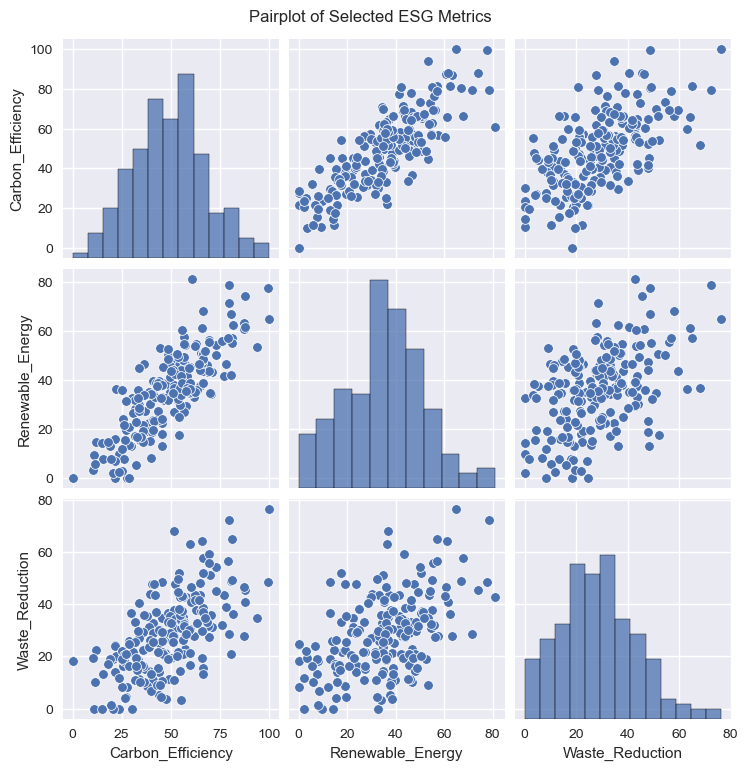

In [14]:
# Pairplot for relationships between selected ESG variables
selected_features = ['Carbon_Efficiency', 'Renewable_Energy', 'Waste_Reduction']
sns.pairplot(esg_df[selected_features])
plt.suptitle('Pairplot of Selected ESG Metrics', y=1.02)
plt.show()


STEP 2: UNDERSTANDING THE DATA

Basic Statistics:
       Carbon_Efficiency  Renewable_Energy  Waste_Reduction  Water_Management  \
count             200.00            200.00           200.00            200.00   
mean               49.17             35.42            28.61             74.98   
std                18.52             16.76            14.94             16.28   
min                 0.00              0.00             0.00             28.52   
25%                35.90             23.75            18.84             63.60   
50%                49.92             35.94            27.97             76.93   
75%                60.02             46.28            37.03             86.89   
max               100.00             81.12            76.37            100.00   

       Employee_Satisfaction  Diversity_Score  Community_Investment  \
count                 200.00           200.00                200.00   
mean                   80.47            81.55                 44.81   
std   

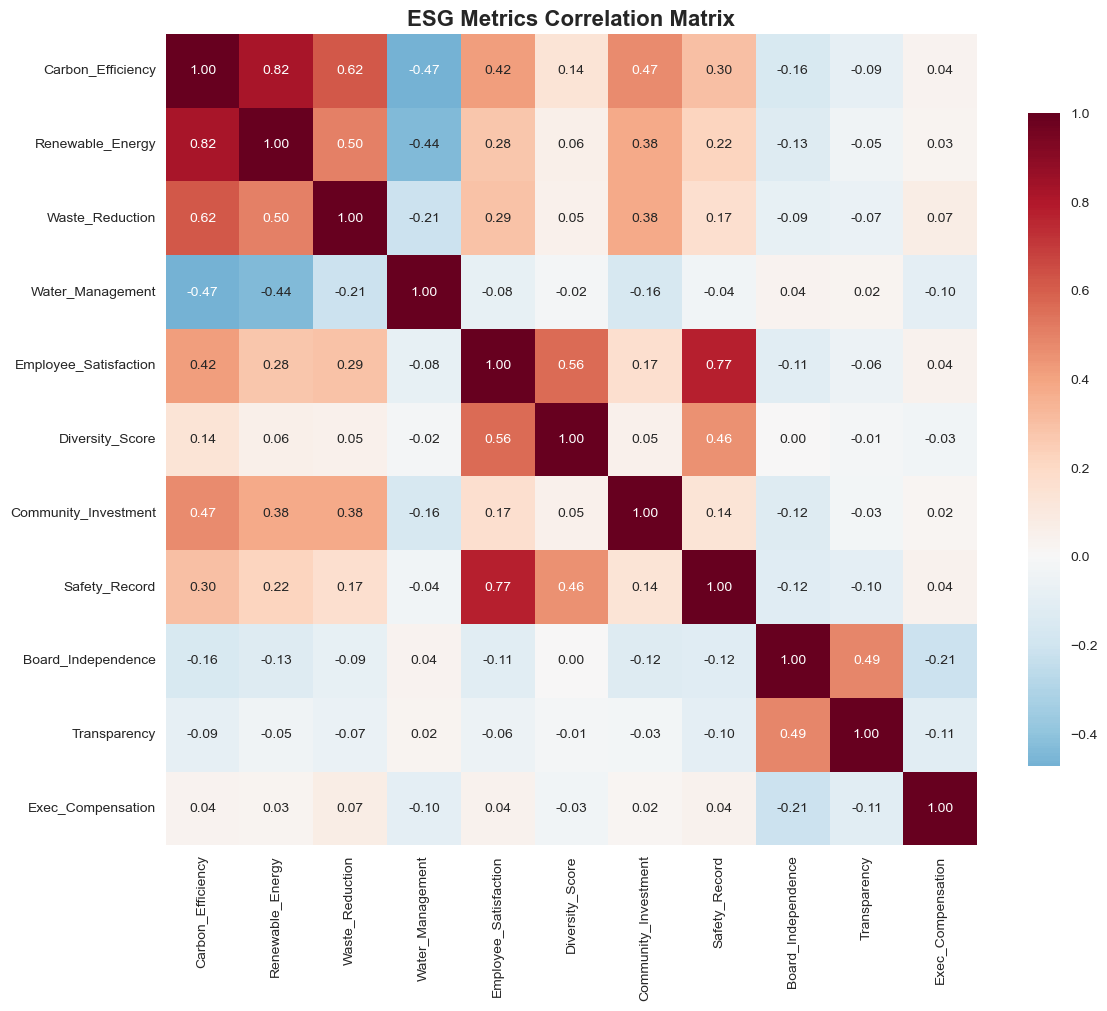


Key Observations:
- Environmental metrics (Carbon, Renewable, Waste) are highly correlated
- Social metrics show moderate correlations
- Governance metrics are somewhat independent
- This suggests we can reduce dimensionality while keeping most information


In [15]:
# =============================================================================
# STEP 2: Exploratory Data Analysis
# =============================================================================

print("\n" + "="*60)
print("STEP 2: UNDERSTANDING THE DATA")
print("="*60)

# Basic statistics
print("\nBasic Statistics:")
print(esg_df.describe().round(2))  # Summary statistics for numerical columns

# Correlation matrix
plt.figure(figsize=(12, 10))
features = esg_df.columns[1:]  # All columns except 'Company'
correlation_matrix = esg_df[features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('ESG Metrics Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Environmental metrics (Carbon, Renewable, Waste) are highly correlated")
print("- Social metrics show moderate correlations")
print("- Governance metrics are somewhat independent")
print("- This suggests we can reduce dimensionality while keeping most information")

## Step 3: Preparing Data for PCA

PCA works best when:
- Data is **numeric**.
- Features are on a **comparable scale**.

**Key preprocessing steps:**
1. **Selecting relevant features** (only the numeric ESG scores here).
2. **Handle NaNs** - if you have any missing values (decide: drop or impute; e.g., `SimpleImputer(strategy="mean")`).
3. **Scaling** using `StandardScaler` so that each feature has mean 0 and variance 1.  
   This ensures that variables measured on different scales contribute equally to the PCA.

**Why scale?**  
Without scaling, a feature with a larger range would dominate the principal components.

In [16]:
# =============================================================================
# STEP 3: PREPARE DATA FOR PCA
# =============================================================================

print("\n" + "="*60)
print("STEP 3: PREPARING DATA FOR PCA")
print("="*60)

# Extract features (remove company names)
X = esg_df[features].values
feature_names = list(features)

print(f"Original data shape: {X.shape}")
print(f"Features: {feature_names}")

# Standardize the data (crucial for PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nData standardized!")
print(f"Mean of standardized data: {X_scaled.mean(axis=0).round(3)}")
print(f"Std of standardized data: {X_scaled.std(axis=0).round(3)}")


STEP 3: PREPARING DATA FOR PCA
Original data shape: (200, 11)
Features: ['Carbon_Efficiency', 'Renewable_Energy', 'Waste_Reduction', 'Water_Management', 'Employee_Satisfaction', 'Diversity_Score', 'Community_Investment', 'Safety_Record', 'Board_Independence', 'Transparency', 'Exec_Compensation']

Data standardized!
Mean of standardized data: [-0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.]
Std of standardized data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Step 4: Applying PCA

Principal Component Analysis reduces the dimensionality of data while retaining most of its variance. PCA finds new axes (principal components) that capture directions of **maximum variance**. 

For an interactive examples, see: https://setosa.io/ev/principal-component-analysis/

**Core ideas:**
- PCA finds new axes (principal components) that capture the maximum variance in the data.
- The first principal component, **PC1**, explains the most variance, the second, **PC2**, explains the next highest, and so on.
- PCA can help **simplify complex datasets** for analysis and visualisation.

Here we:
- Create a PCA model with a specified number of components.
- Fit it to the scaled ESG data.
- Extract the transformed data for further analysis.

**What you get**
- **Explained variance ratio** per component.
- **Component loadings** (weights linking components to original features).
- **Scores** (the coordinates of each observation in PC space).


In [17]:
# =============================================================================
# STEP 4: APPLY PCA
# =============================================================================

print("\n" + "="*60)
print("STEP 4: APPLYING PCA")
print("="*60)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by Component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%) | Cumulative: {cum_var:.3f} ({cum_var*100:.1f}%)")


STEP 4: APPLYING PCA
Explained Variance by Component:
PC1: 0.308 (30.8%) | Cumulative: 0.308 (30.8%)
PC2: 0.164 (16.4%) | Cumulative: 0.472 (47.2%)
PC3: 0.139 (13.9%) | Cumulative: 0.611 (61.1%)
PC4: 0.087 (8.7%) | Cumulative: 0.698 (69.8%)
PC5: 0.078 (7.8%) | Cumulative: 0.776 (77.6%)
PC6: 0.060 (6.0%) | Cumulative: 0.836 (83.6%)
PC7: 0.050 (5.0%) | Cumulative: 0.886 (88.6%)
PC8: 0.044 (4.4%) | Cumulative: 0.930 (93.0%)
PC9: 0.038 (3.8%) | Cumulative: 0.969 (96.9%)
PC10: 0.019 (1.9%) | Cumulative: 0.988 (98.8%)
PC11: 0.012 (1.2%) | Cumulative: 1.000 (100.0%)


### Visualising Explained Variance

Once PCA is applied, we can plot:
- **Explained variance ratio**: The proportion of the dataset's variance captured by each principal component.
- **Cumulative variance**: Helps decide how many components are enough to retain most of the information.

These plots help determine the optimal number of components to keep for analysis.

Two common plots:
- **Bar plot** of `explained_variance_ratio_` for each PC.
- **Cumulative variance** curve to decide how many PCs to retain.

**Rule of thumb**
Choose the smallest number of PCs that explain a high share of variance (e.g., 80–95%), balancing simplicity and information retention.

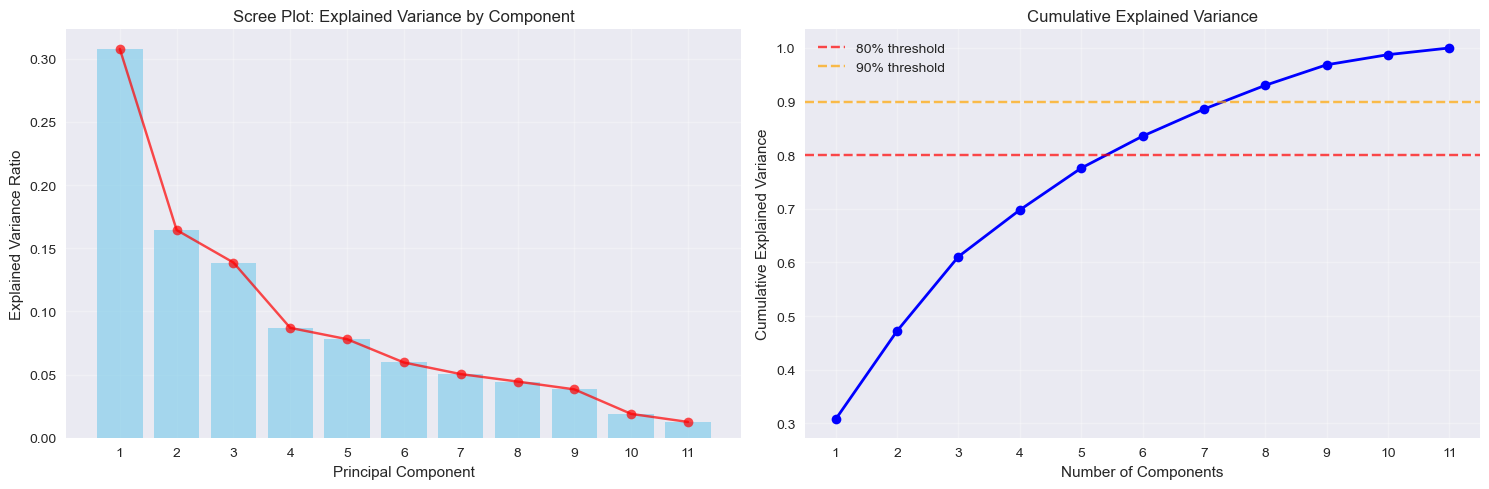


Components needed:
80% variance: 6 components
90% variance: 8 components
Original features: 11 features


In [18]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
ax1.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue')
ax1.plot(range(1, len(explained_variance)+1), explained_variance, 'ro-', alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot: Explained Variance by Component')
ax1.set_xticks(range(1, len(explained_variance)+1))  # Ensure all x-axis labels show
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'bo-', linewidth=2)
ax2.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% threshold')
ax2.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumulative_variance)+1))  # Ensure all x-axis labels show
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# How many components for 80% and 90% variance?
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

print(f"\nComponents needed:")
print(f"80% variance: {n_components_80} components")
print(f"90% variance: {n_components_90} components")
print(f"Original features: {len(feature_names)} features")

## Step 5: Interpreting Principal Components

Each principal component is a **linear combination** of the original variables.  
The coefficients (called **loadings**) indicate how much each original feature contributes to a component.

**Why interpretation matters:**
- It tells us what each component represents in practical terms.
- In ESG analysis, one component might capture overall ESG performance, while another might reflect trade-offs between environmental and governance scores.

**Loadings** show how each original variable contributes to each PC.

- Large positive loading ⇒ variable moves **with** the component.
- Large negative loading ⇒ variable moves **against** the component.

**In ESG**
- PC1 may reflect an **overall ESG level**.
- PC2 might capture **trade-offs** (e.g., Environmental vs Social focus).
- PC3 could highlight **Governance** nuances.

Interpretation depends on signs and magnitudes of loadings.


STEP 5: INTERPRETING THE COMPONENTS
Component Loadings (First 4 Components):
                         PC1    PC2    PC3    PC4
Carbon_Efficiency      0.478 -0.212  0.089 -0.027
Renewable_Energy       0.422 -0.268  0.106 -0.006
Waste_Reduction        0.366 -0.208  0.068 -0.125
Water_Management      -0.249  0.290 -0.081 -0.421
Employee_Satisfaction  0.368  0.465  0.041  0.048
Diversity_Score        0.202  0.512  0.094  0.062
Community_Investment   0.295 -0.197  0.054 -0.289
Safety_Record          0.316  0.485 -0.010  0.036
Board_Independence    -0.145  0.028  0.650  0.150
Transparency          -0.099 -0.006  0.637  0.267
Exec_Compensation      0.061 -0.053 -0.357  0.789


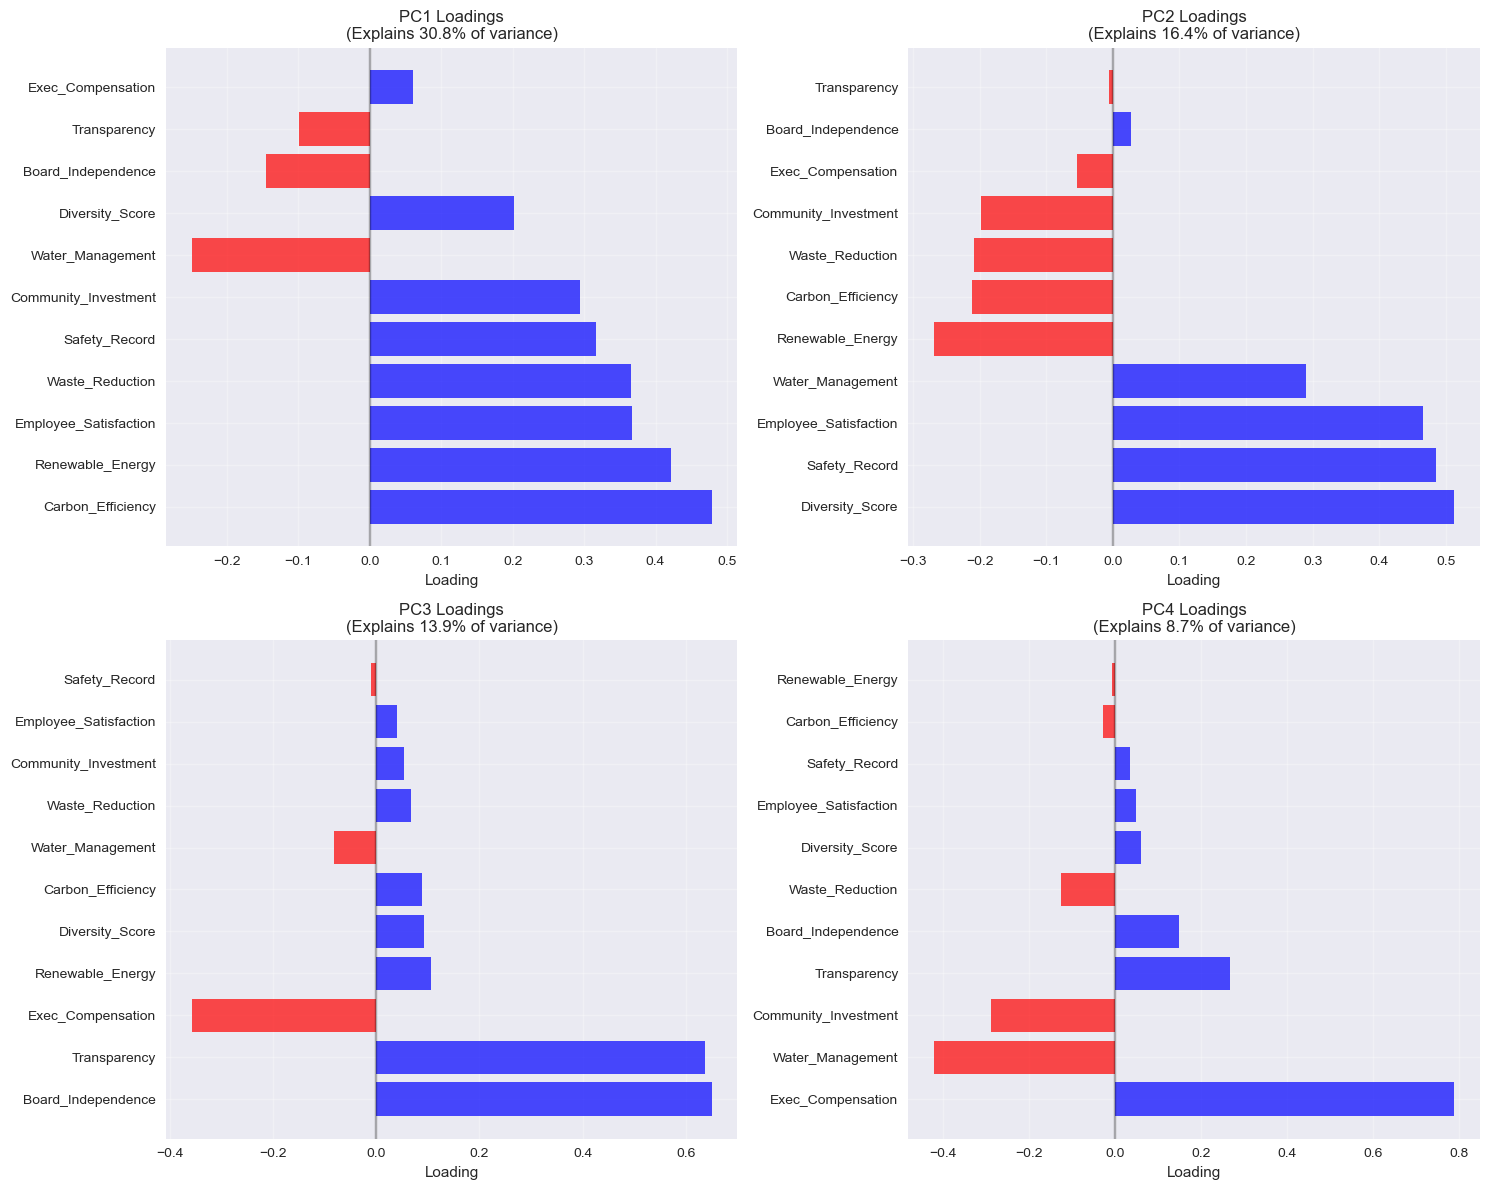


Component Interpretation:
PC1 (Overall ESG Performance): High loadings on environmental and social metrics
PC2 (Environmental vs Social Focus): Contrasts environmental vs social priorities
PC3 (Governance Focus): High loadings on governance metrics


In [19]:
# =============================================================================
# STEP 5: INTERPRET THE COMPONENTS
# =============================================================================

print("\n" + "="*60)
print("STEP 5: INTERPRETING THE COMPONENTS")
print("="*60)

# Get component loadings (how much each original feature contributes to each PC)
components_df = pd.DataFrame(
    pca.components_[:4].T,  # First 4 components
    columns=[f'PC{i+1}' for i in range(4)],
    index=feature_names
)

print("Component Loadings (First 4 Components):")
print(components_df.round(3))

# Visualize component loadings
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i in range(4):
    pc_name = f'PC{i+1}'
    loadings = components_df[pc_name].sort_values(key=abs, ascending=False)
    
    colors = ['red' if x < 0 else 'blue' for x in loadings]
    bars = axes[i].barh(range(len(loadings)), loadings.values, color=colors, alpha=0.7)
    axes[i].set_yticks(range(len(loadings)))
    axes[i].set_yticklabels(loadings.index)
    axes[i].set_xlabel('Loading')
    axes[i].set_title(f'{pc_name} Loadings\n(Explains {explained_variance[i]:.1%} of variance)')
    axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpret the first few components
print("\nComponent Interpretation:")
print("PC1 (Overall ESG Performance): High loadings on environmental and social metrics")
print("PC2 (Environmental vs Social Focus): Contrasts environmental vs social priorities")
print("PC3 (Governance Focus): High loadings on governance metrics")

## Step 6: Visualising in Reduced Dimensions

By projecting the data onto the first two principal components, we can create a 2D scatter plot.  
This allows us to see **patterns, groupings, and outliers** that may not be obvious in the high-dimensional space.

**Benefits of visualisation:**
- Easier to interpret results: Helps reveal **clusters**, **patterns**, and **outliers**.
- Possible to detect clusters of similar companies. Colour by **Sector** and shape/size by **cluster** or other metadata.
- Useful for presentations, reporting, and communicating structure to non-technical audiences.




STEP 6: VISUALIZING IN REDUCED DIMENSIONS


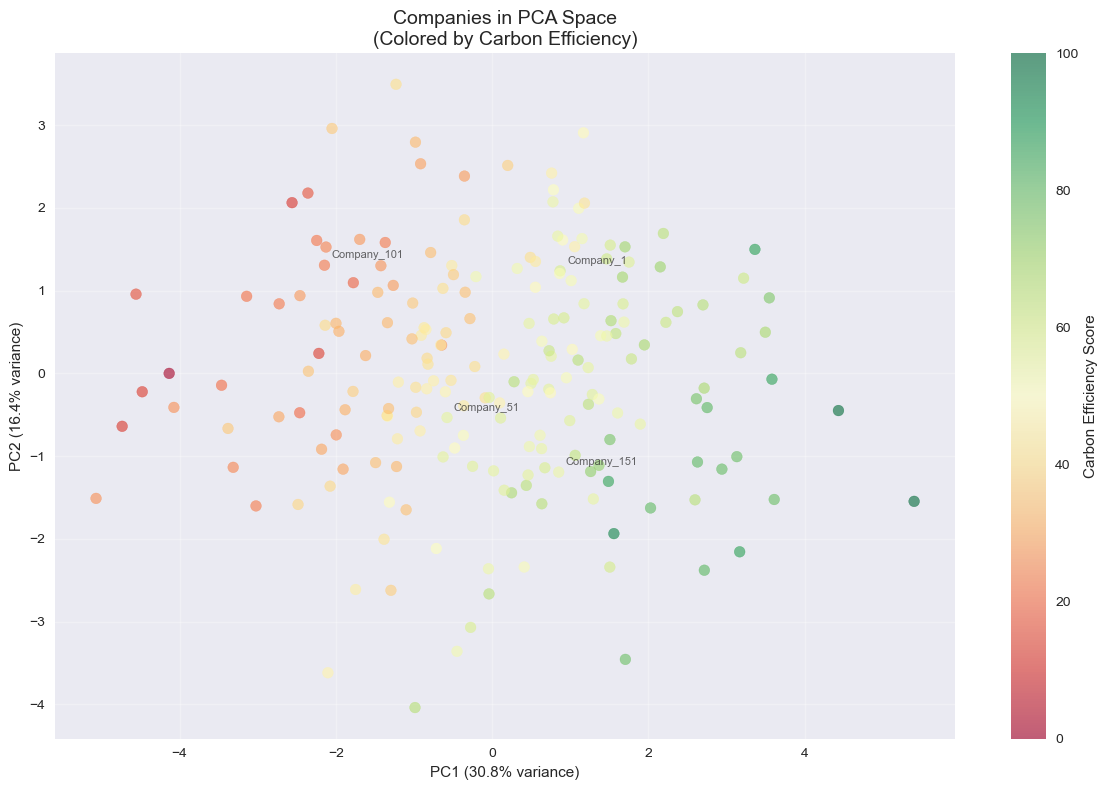

In [20]:
# =============================================================================
# STEP 6: VISUALIZE IN REDUCED DIMENSIONS
# =============================================================================

print("\n" + "="*60)
print("STEP 6: VISUALIZING IN REDUCED DIMENSIONS")
print("="*60)

# Create PCA scatter plot
plt.figure(figsize=(12, 8))

# Use first two components for visualization
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=esg_df['Carbon_Efficiency'], cmap='RdYlGn',
                     alpha=0.6, s=60)

plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Companies in PCA Space\n(Colored by Carbon Efficiency)', fontsize=14)
plt.colorbar(scatter, label='Carbon Efficiency Score')
plt.grid(True, alpha=0.3)

# Add some example company labels
for i in [0, 50, 100, 150]:
    plt.annotate(esg_df.iloc[i]['Company'], 
                (X_pca[i, 0], X_pca[i, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

## Step 7: Practical Application

Here we demonstrate how PCA results can be integrated into further analysis, such as:
- Grouping companies based on their positions in principal component space.
- Linking PCA results to other business or financial variables.

In finance, PCA can:
- Reduce the number of risk factors in portfolio models.
- Help identify dominant themes in ESG performance.
- Aid in detecting anomalies or unusual profiles.

Once you have component **scores**:

- Use **PC1/PC2** as features for **clustering** (e.g., K-Means).
- Incorporate PCs into **risk models** or **portfolio construction** (dimension reduction).
- Track PCs over time to monitor shifts in **ESG profiles**.

**Caveats**
- PCA is **linear**; non-linear structure may need t-SNE/UMAP.
- PCs are **unsupervised**; they optimise variance, not predictive accuracy by default.
- Always relate PCs back to the **business/finance context**.

In [21]:
# =============================================================================
# STEP 7: PRACTICAL APPLICATION
# =============================================================================

print("\n" + "="*60)
print("STEP 7: PRACTICAL APPLICATION")
print("="*60)

# Create a simplified ESG score using first 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Weight components by their explained variance
weights = pca_3.explained_variance_ratio_
composite_score = np.dot(X_pca_3, weights)

# Add to original dataframe
esg_df['PCA_ESG_Score'] = composite_score
esg_df['PC1_Overall'] = X_pca_3[:, 0]
esg_df['PC2_EnvvsSocial'] = X_pca_3[:, 1]
esg_df['PC3_Governance'] = X_pca_3[:, 2]

# Show top and bottom performers
print("Top 10 ESG Performers (by PCA composite score):")
top_performers = esg_df.nlargest(10, 'PCA_ESG_Score')[['Company', 'PCA_ESG_Score', 'Carbon_Efficiency', 'Employee_Satisfaction', 'Board_Independence']]
print(top_performers.round(2))

print("\nBottom 10 ESG Performers:")
bottom_performers = esg_df.nsmallest(10, 'PCA_ESG_Score')[['Company', 'PCA_ESG_Score', 'Carbon_Efficiency', 'Employee_Satisfaction', 'Board_Independence']]
print(bottom_performers.round(2))


STEP 7: PRACTICAL APPLICATION
Top 10 ESG Performers (by PCA composite score):
         Company  PCA_ESG_Score  Carbon_Efficiency  Employee_Satisfaction  \
113  Company_114           1.63              99.26                 100.00   
179  Company_180           1.45             100.00                 100.00   
167  Company_168           1.37              87.94                 100.00   
53    Company_54           1.27              62.23                 100.00   
141  Company_142           1.25              76.14                 100.00   
161  Company_162           1.21              65.74                 100.00   
91    Company_92           1.11              69.37                  95.36   
75    Company_76           1.09              66.44                 100.00   
54    Company_55           0.99              70.62                 100.00   
156  Company_157           0.97              87.32                 100.00   

     Board_Independence  
113               82.71  
179               59.

In [22]:
# =============================================================================
# STEP 8: KEY TAKEAWAYS
# =============================================================================

print("\n" + "="*60)
print("KEY TAKEAWAYS FOR STUDENTS")
print("="*60)

print(f"""
1. DIMENSIONALITY REDUCTION:
   - Reduced {len(feature_names)} ESG metrics to {n_components_80} components (80% variance)
   - Much easier to analyze and visualize

2. COMPONENT INTERPRETATION:
   - PC1: Overall ESG performance (companies good at everything)
   - PC2: Environmental vs Social trade-offs
   - PC3: Governance quality
   
3. PRACTICAL BENEFITS:
   - Create composite ESG scores
   - Identify company clusters and patterns
   - Reduce noise in data
   - Enable better portfolio construction

4. IMPORTANT NOTES:
   - Always standardize data before PCA
   - Components are linear combinations of original features
   - Interpretation requires background knowledge in (sustainable/environmental) finance and ESG
   - PCA assumes linear relationships

5. NEXT STEPS:
   - Use PCA scores in portfolio optimization
   - Cluster companies by ESG profiles
   - Build predictive models with reduced features
""")

# Save results for further analysis
esg_results = esg_df[['Company', 'PCA_ESG_Score', 'PC1_Overall', 'PC2_EnvvsSocial', 'PC3_Governance']]
print(f"\nResults saved! You can use these PCA scores for further analysis.")
print("Try: portfolio optimization, clustering, or risk modeling!")


KEY TAKEAWAYS FOR STUDENTS

1. DIMENSIONALITY REDUCTION:
   - Reduced 11 ESG metrics to 6 components (80% variance)
   - Much easier to analyze and visualize

2. COMPONENT INTERPRETATION:
   - PC1: Overall ESG performance (companies good at everything)
   - PC2: Environmental vs Social trade-offs
   - PC3: Governance quality
   
3. PRACTICAL BENEFITS:
   - Create composite ESG scores
   - Identify company clusters and patterns
   - Reduce noise in data
   - Enable better portfolio construction

4. IMPORTANT NOTES:
   - Always standardize data before PCA
   - Components are linear combinations of original features
   - Interpretation requires background knowledge in (sustainable/environmental) finance and ESG
   - PCA assumes linear relationships

5. NEXT STEPS:
   - Use PCA scores in portfolio optimization
   - Cluster companies by ESG profiles
   - Build predictive models with reduced features


Results saved! You can use these PCA scores for further analysis.
Try: portfolio optimiza

## Wrap-up

You have:
- Cleaned and scaled ESG features.
- Applied PCA and interpreted explained variance.
- Read loadings to understand what the PCs represent.
- Visualised companies in a reduced 2D space.

**Next steps**
- Compare PCA to **factor analysis** or **ICA**.
- Try **clustering** in PC space.
- Use PCs in **predictive models** and **backtests**.